In [28]:
#import libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf
import datetime


[*********************100%***********************]  1 of 1 completed


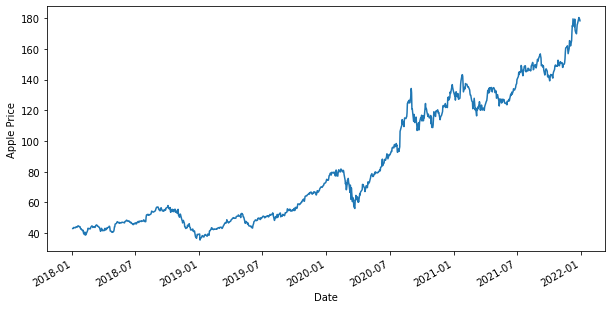

In [38]:
ticker = "AAPL"
df = pdr.get_data_yahoo(ticker, start="2018-01-01", end="2021-12-31")         
df= df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel("Apple Price")
plt.show()

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.188156,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.180992,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.372272,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.843315,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.687889,82271200


In [43]:
df.to_csv(ticker + '_2018-2022.csv') #5 years record save as csv file

In [41]:
df_test =pdr.get_data_yahoo(ticker, start="2021-01-01", end="2021-12-31") 
df_test.to_csv(ticker + '_2022Dec.csv')

[*********************100%***********************]  1 of 1 completed


In [49]:
dataset_train = pd.read_csv(ticker + '_2018-2022.csv')
training_set = dataset_train.iloc[:, 2:3].values

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [51]:
X_train = []
y_train = []
for i in range(60, 965):
    X_train.append(training_set_scaled[i-60:i, 0])  # Call upon the previous 60
    y_train.append(training_set_scaled[i, 0])  # i because it is the 61th index
X_train, y_train = np.array(X_train), np.array(y_train)

In [53]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
# Creating a 3_D shape, numpy arrays stacked into indicators

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [56]:
# Initializing the RNN
regressor = Sequential()

In [57]:
#adding first LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  # Starting with 50 neurons, True for stacking
regressor.add(Dropout(0.2))  # Drop 20%

In [58]:
# 2nd LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))  # Starting with 50 neurons, remove input layer
regressor.add(Dropout(0.2))  # Drop 20%

# 3rd LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))  # Starting with 50 neurons, True for stacking
regressor.add(Dropout(0.2))  # Drop 20%

# 4th LSTM layer
regressor.add(LSTM(units = 50))  # Starting with 50 neurons, False - Last in the stack
regressor.add(Dropout(0.2))  # Drop 20%

In [59]:
# Output Layer
regressor.add(Dense(units = 1)) #outer layer

In [60]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  # Adam is awlays a good place to start

In [61]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 6s 47ms/step - loss: 0.0321
Epoch 2/100
29/29 [==============================] - 1s 46ms/step - loss: 0.0039
Epoch 3/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 4/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0034
Epoch 5/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0034
Epoch 6/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0031
Epoch 7/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0040
Epoch 8/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0028
Epoch 9/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0026
Epoch 10/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0031
Epoch 11/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0027
Epoch 12/100
29/29 [==============================] - 1s 43ms/step - loss: 0.0028
Epoch 13/100
29/29 [=====